# **Machine Learning –: Linear Regression Example**
---------
---------

- ## Import required libraries

In [1]:
import pandas as pd
import numpy as np

- ### Loading ***student_scores***  dataset

In [2]:
df = pd.read_csv("E:\Data Science Notes\8.MACHINE LEARNING\student_scores\student_scores.csv")


- ### Doing some EDA

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.nunique()

Hours     23
Scores    23
dtype: int64

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

- ## Plotting the dataset

In [8]:
import matplotlib.pyplot as plt

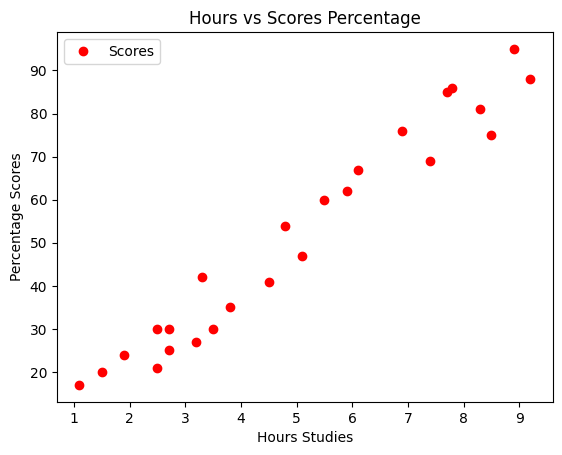

In [9]:

df.plot(x = 'Hours', y = 'Scores', style = 'o' , c = 'r' )

plt.title('Hours vs Scores Percentage')

plt.xlabel('Hours Studies')
plt.ylabel('Percentage Scores')

plt.show()

- ### Data Preparation

In [10]:
X = df.iloc[:, :-1].values 

y = df.iloc[:, 1].values


- ### Splitting the data 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [13]:
print("X_train") 
print(X_train) 
 
print() 
print("X_test") 
print(X_test) 
 
print() 
print("Y_train") 
print(y_train) 
 
print() 
print("y_test") 
print(y_test)


X_train
[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]

X_test
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]

Y_train
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]

y_test
[20 27 69 30 62]


- ##  Training the model

In [14]:
from sklearn.linear_model import LinearRegression 


In [15]:
lr = LinearRegression() 

lr.fit(X_train, y_train)


LinearRegression()

- ### Getting intercept & cofficient from train model

In [16]:
# intercept

b = lr.intercept_
b

2.0181600414346974

In [17]:
# cofficient

m = lr.coef_
m

array([9.91065648])

### Find the **prediction value** by using formula

In [18]:
# y = coefficient*input + intercept
# y = mx + b

y = m * 8.5 + b

y

array([86.25874013])

- ## predicted value without formula

In [19]:
lr.predict([[8.5]])

array([86.25874013])

In [20]:
y_pred = lr.predict(X_test)

y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

- ## Comparing the Actual & Predicted result

In [21]:

d = {'Actual': y_test, 'Predicted': y_pred} 
 
compare_df = pd.DataFrame(d) 

print(compare_df) 


   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


- ## Evaluation metrics 
    - Mean Absolute Error (MAE)
    - Mean Squared Error (MSE)  
    - Root Mean Squared Error (RMSE)  

In [22]:
from sklearn import metrics

In [23]:

mae = metrics.mean_absolute_error(y_test, y_pred) 

mse = metrics.mean_squared_error(y_test, y_pred) 

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


In [24]:
print("mean_absolute_error : " , mae)

mean_absolute_error :  4.183859899002975


In [25]:
print("mean_squared_error : ", mse)

mean_squared_error :  21.598769307217406


In [26]:
print("root mean_squared_error : ", rmse)

root mean_squared_error :  4.647447612100367


- ## Plotting the actual vs predicted values

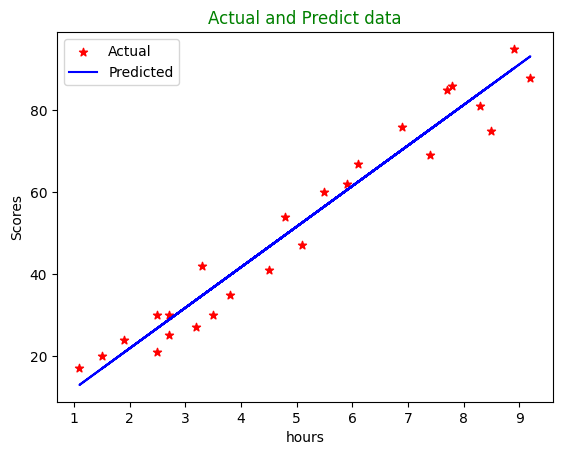

In [28]:

plt.xlabel('hours') 
plt.ylabel('Scores') 

plt.title('Actual and Predict data', c = 'g')

plt.scatter(df.Hours.values, df.Scores.values, color = 'red', marker = '*',label = 'Actual') 
 
plt.plot(df.Hours.values, lr.predict(df[['Hours']].values), color = 'blue',label = 'Predicted') 

plt.legend()
plt.show() 

- ## Check the Score 

In [34]:
lr.score(df[['Hours']].values,df[['Scores']].values)*100

95.26947647057274